# README
To run this notebook, you need to install the following packages:
- `numpy` (For the linear regression from scratch)
- `pandas` (To load the xlsx file into a dataframe to convert into numpy)
- `openpyxl` (to assist pandas in loading the xlsx file)
- `matplotlib` (for visualization)

Note: I moved the xlsx and npy files in a `data/` folder for oganizational purposes.

I have included a git clone command below in order to make it as painless of a setup as possible.  

In [ ]:
!git init
!git remote add origin https://github.com/dutch-casa/machine.learning.regression.git
!git fetch origin
!git reset --hard origin/main


# Part One - Visualization And Base Functions
Suppose that you are conducting a scientific experiment where you are observing
the effects of one variable (x_train.npy and x_test.npy) on the output (y_train.npy
and y_test.npy).

Your goal is to come up with a linear regression model that can take the training
data (x_train.npy and y_train.npy) and model the relationship between the
variables x and y. You should implement your own version of linear regression
either using gradient descent or normal equations. You SHOULD NOT use any prepackaged library such as Sci-Kit Learn.
Here are somethings to keep in mind for tackling this problem:
1. Try to plot this relationship on your own using matplotlib. You can also
visualize the test data to see if it gives you any clues about the underlying
relationship between the variables.
2. Use your knowledge gleaned from the previous step to answer the following
questions:
a. What are some functions that you can try map the relation between x
and y? Plot each of them individually to verify!

You will need to write a short report detailing your thought process, the code you
wrote in Python to implement the linear regression model and the equation that
models the relationship between x and y that you found. You should provide 
evidence that corroborates your final statement such as plots, prediction errors,
etc.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

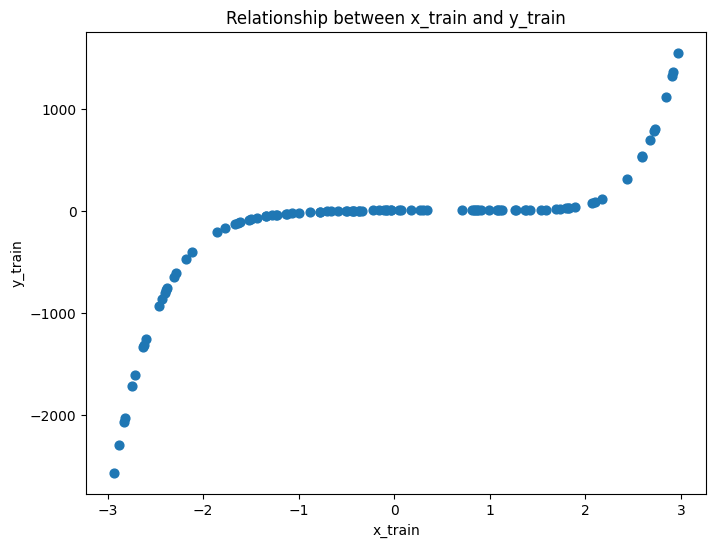

In [2]:
# First I just want to get all of our data in memory to work with

x_train = np.load("data/x_train.npy")
y_train = np.load("data/y_train.npy")
x_test  = np.load("data/x_test.npy")
y_test  = np.load("data/y_test.npy")

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, s=40)
plt.title("Relationship between x_train and y_train")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()

## Linear Regression definition and implementation
Below I've written the latex for linear regression solver so I can reference it as I work

Closed form (least-squares solution):

$$
\theta = (X^T X)^{-1} X^T y
$$

- $X \in \mathbb{R}^{n \times d}$ — feature matrix (rows = samples, cols = features + bias)
- $y \in \mathbb{R}^{n}$ — targets
- $\theta \in \mathbb{R}^{d}$ — weights



In [3]:
def add_bias(X):
    X = np.asarray(X)
    if X.ndim == 1:
        X = X[:, None]
    ones = np.ones((X.shape[0], 1))
    return np.hstack([X, ones])

def fit(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

def predict(X, theta):
    return X @ theta

In [4]:
# Training

X = add_bias(x_train)
theta = fit(X, y_train)

yhat = predict(X, theta)

print("Theta: ", theta)
print("yhat: ", yhat)
print("MSE: ", np.mean((y_train - yhat)**2))

Theta:  [ 300.61954771 -106.17379612]
yhat:  [ 771.23964588  768.00224098 -131.7117938  -257.91909513  432.99446247
 -477.54282649  219.22174242  699.56308426  514.96588608 -508.98219905
  625.30642188 -665.41461952 -476.40978254  319.93750769 -155.82344757
  712.13824285 -115.39371316 -447.52441485 -172.0579877   148.93181806
  -90.17439847 -824.4208278  -234.10822232 -597.29474889 -742.76484633
  137.3755382   749.83358155  786.18094604 -847.40608218  145.69866646
 -217.40467872 -318.83865795 -558.32168222 -800.52775618  441.31075912
  166.5464429  -304.24623133 -235.60657979 -218.59232761 -986.75069384
 -820.81490011 -118.03901921 -283.08093891 -429.10451443  404.01798479
  354.9316134   714.21502686 -339.78195481  154.41920908 -895.49162053
  306.11515239  674.05459039 -563.38152054  -26.23882537  274.67445774
 -372.06963363 -130.50860947   -3.87078192 -209.21961503  674.17694776
 -538.22618943  233.04785075  546.66975752  370.59196513  413.94257507
  461.36070878 -593.0386139   52

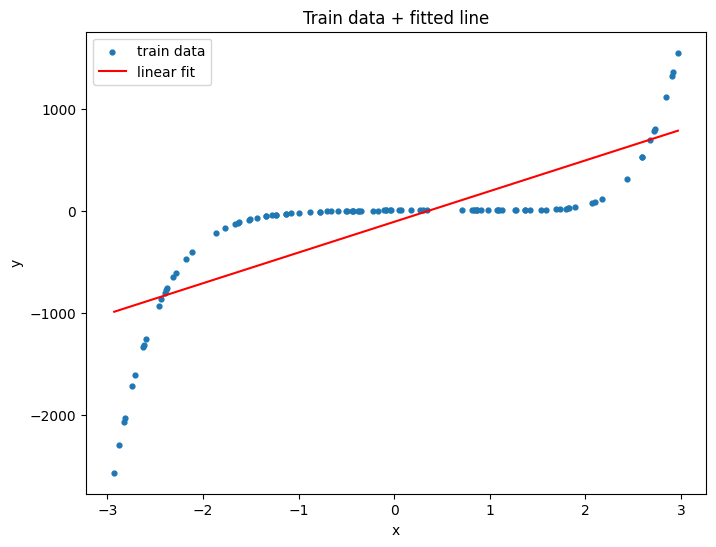

In [5]:
order = np.argsort(x_train)

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, s=12, label="train data")
plt.plot(x_train[order], yhat[order], label="linear fit", color="r")
plt.title("Train data + fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [6]:
X_test = add_bias(x_test)
yhat_test = predict(X_test, theta)

print("Test MSE:", np.mean((y_test - yhat_test)**2))

Test MSE: 35281.33990446923


So the error is dreadful, and we will need to implement polynomial linear regression in order to have it truly fit to the training data.

Pretty simple though, just build a new feature matrix (X) where each column is a power of (x) (basis functions; feature map), then run the exact same normal-equation solve on that (X).
 

In [7]:
def poly_X(x, degree):
    x = x.reshape(-1, 1)
    X = np.hstack([x**k for k in range(1, degree + 1)])
    return np.hstack([X, np.ones((len(x), 1))])        


In [8]:
degree = 10
X = poly_X(x_train, degree)
theta = fit(X, y_train)

yhat = predict(X, theta)

print("degree:", degree)
print("theta:", theta)
print("train mse:", np.mean((y_train - yhat)**2))


degree: 10
theta: [ 1.00000000e+01  2.30227294e-10  4.00000000e+00 -8.00000000e+00
  5.02622151e-11  8.18498988e-11  1.00000000e+00 -1.12825257e-11
  4.29143992e-13  5.36692565e-13  6.00000000e+00]
train mse: 1.4150595657703644e-21


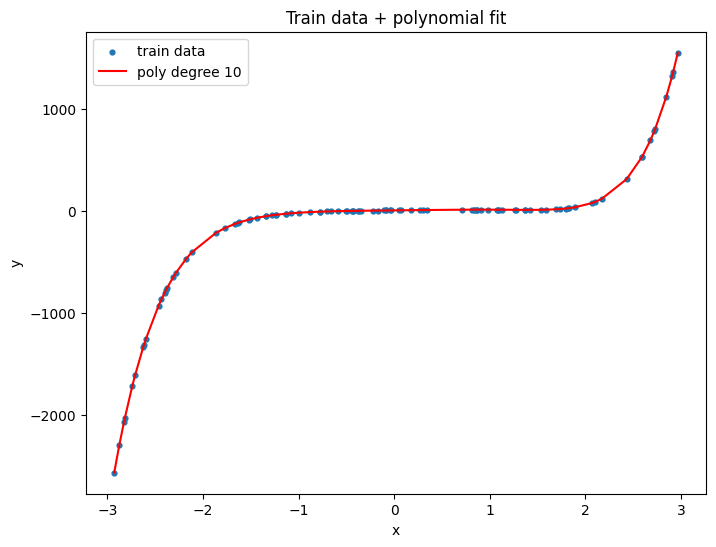

In [9]:
order = np.argsort(x_train)

plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, s=12, label="train data")
plt.plot(x_train[order], yhat[order], label=f"poly degree {degree}", color="red")
plt.title("Train data + polynomial fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [10]:
X_test = poly_X(x_test, degree)
yhat_test = predict(X_test, theta)

print("test mse:", np.mean((y_test - yhat_test)**2))


test mse: 8.74360821440423e-22


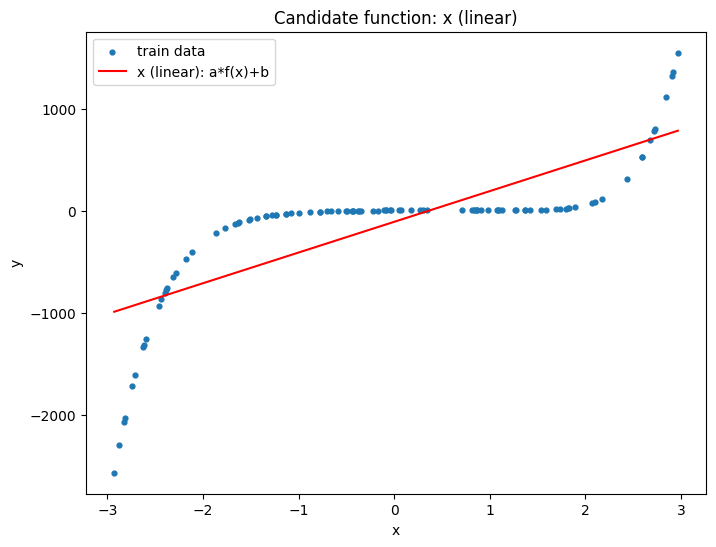

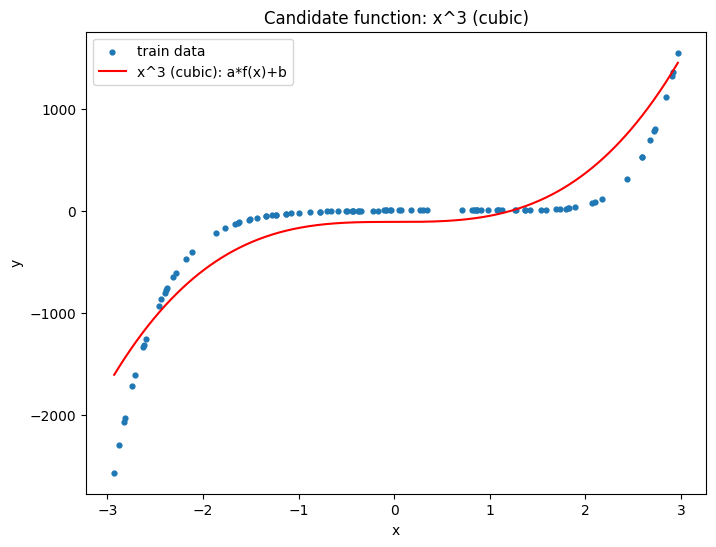

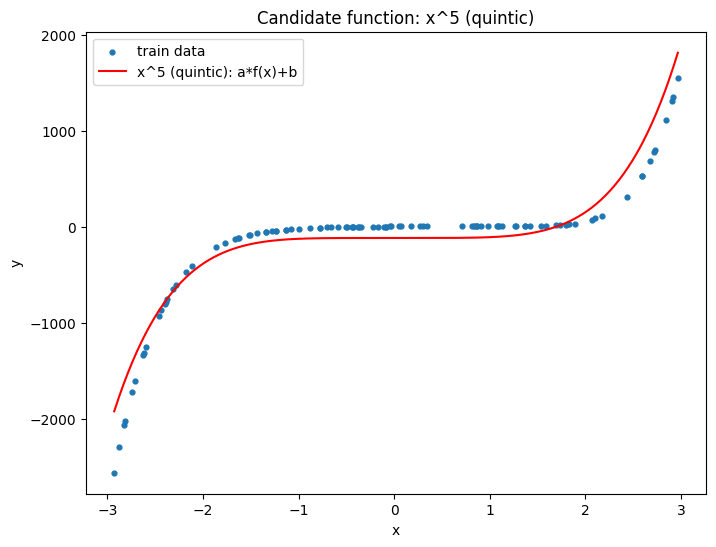

In [11]:
xs = np.linspace(x_train.min(), x_train.max(), 500)

def fit_affine_to_basis(phi_train):
    X = np.hstack([phi_train.reshape(-1,1), np.ones((len(phi_train),1))])
    return fit(X, y_train)  

# Disclosure: I had generative AI help write this plt code because I find it tedious
def plot_candidate(name, phi):
    
    phi_tr = phi(x_train)
    a, b = fit_affine_to_basis(phi_tr)

    ys = a * phi(xs) + b

    plt.figure(figsize=(8,6))
    plt.scatter(x_train, y_train, s=12, label="train data")
    plt.plot(xs, ys, label=f"{name}: a*f(x)+b", color="red")
    plt.title(f"Candidate function: {name}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend()
    plt.show()

plot_candidate("x (linear)", lambda t: t)
plot_candidate("x^3 (cubic)",  lambda t: t**3)
plot_candidate("x^5 (quintic)",lambda t: t**5)


## Report

For part one, I was tasked to implement linear regression from scratch.  
First I loaded the data from the `.npy` files and plotted it to confirm the relationship matched the assignment description.

Linear regression follows this simple model:
$$
y = \theta_0 + \theta_1 x
$$
where $\theta_0$ is the intercept and $\theta_1$ is the slope.

To compute the optimal parameters, I used the normal equation:
$$
\theta = (X^T X)^{-1} X^T y
$$
where $X$ is the design matrix (features + bias column) and $y$ is the vector of targets.  
This closed-form solution minimizes mean squared error.

I implemented 3 functions:

- **`add_bias:`** converts the 1D input $x$ into a design matrix $X = [x, 1]$ by appending a column of ones for the intercept term  
- **`fit`:** computes the optimal parameter vector $\theta$ using the normal equation (implemented with `np.linalg.solve`)  
- **`predict`:** computes predictions using matrix multiplication $\hat y = X\theta$

After fitting a straight line (degree 1), the model had high error and clearly underfit the data, since the scatter plot showed a nonlinear S-shaped relationship.

To address this, I expanded the feature matrix using polynomial basis functions:
$$
X = [x, x^2, x^3, \dots, x^d, 1]
$$
```python
def poly_X(x, degree):
    x = x.reshape(-1, 1)
    X = np.hstack([x**k for k in range(1, degree + 1)])
    return np.hstack([X, np.ones((len(x), 1))])        
```
and applied the same linear regression solver. This allows the model to remain linear in parameters while representing nonlinear relationships in $x$.dfTesting multiple polynomial degrees showed that higher-order polynomials fit the curve significantly better and reduced prediction error. The final polynomial model closely matched the training data and achieved lower MSE on both training and test sets.

Therefore, polynomial regression using basis expansion provided a better model of the relationship between $x$ and $y$ than a simple straight line.


# Part Two - Business Application
Imagine that you are a realtor in Auburn. You have data points (See excel file. Last
column is the target variable.) that correspond to the recent sales of different
houses in and around Auburn. Your goal is to help estimate the prices of houses
that one can use to sell or buy listings. Can you use your knowledge of linear
regression to find the best regression model? Use your implementation from
Question 1 (without any basis functions) to answer the following questions.
1. What is the average least squares error for the given data using your simple
linear regression model?
2. Which factor has the most effect on the final value? How do you know this?
Can you use only this feature to predict the price?
3. Which factor has the least effect on the final value? How do you know this?
What effect does removing this feature have on the performance?


## Imports

In [12]:
# We need pandas to load the data from excel.
import pandas as pd
# I re imported these because I'm parnoid the TAs might run it starting from here.
# So just starting afresh just in case.
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_frame = pd.read_excel('data/Housing_data_regression.xlsx')
data_frame.head()

,House ID,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Price
0,1,1.0,3.472,0.998,1.0,7,4,42,491760.0
1,2,1.0,3.531,1.500,2.0,7,4,62,502080.0
2,3,1.0,2.275,1.175,1.0,6,3,40,454290.0
3,4,1.0,4.050,1.232,1.0,6,3,54,455730.0
4,5,1.0,4.455,1.121,1.0,6,3,42,505970.0


## Exploratory Data Analysis

In [14]:
data = data_frame.values

features = data_frame.drop(columns=["House ID", "Price"]).values
prices = data_frame["Price"].values


features.shape, prices.shape

((20, 7), (20,))

Bathrooms and Price have a correlation coefficient of 0.93


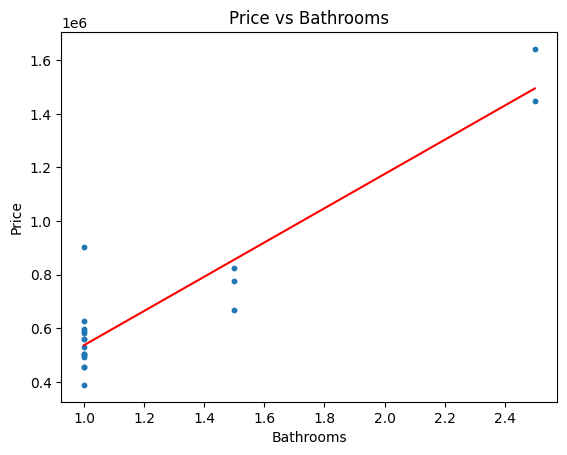

Land Area and Price have a correlation coefficient of 0.73


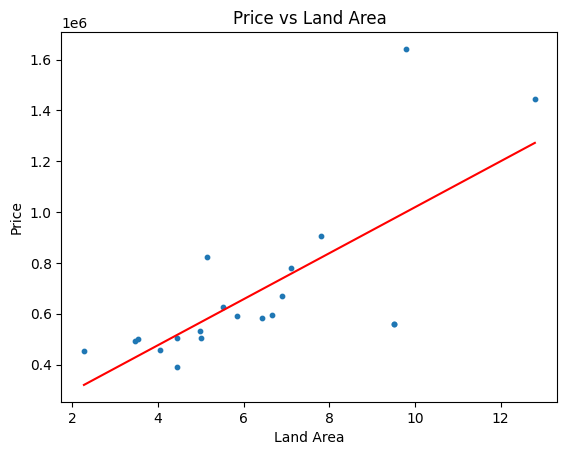

Living area and Price have a correlation coefficient of 0.94


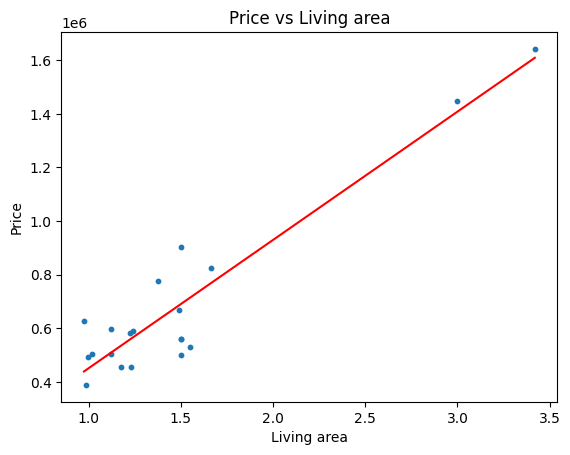

# Garages and Price have a correlation coefficient of 0.49


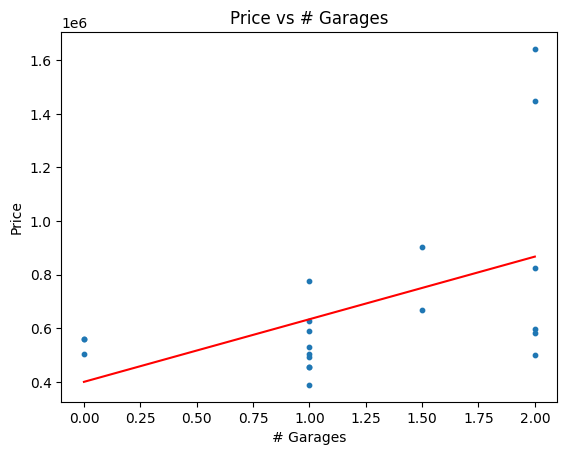

# Rooms and Price have a correlation coefficient of 0.85


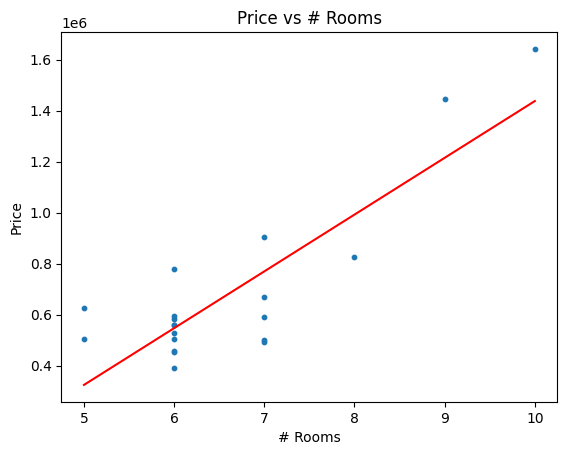

# Bedrooms and Price have a correlation coefficient of 0.72


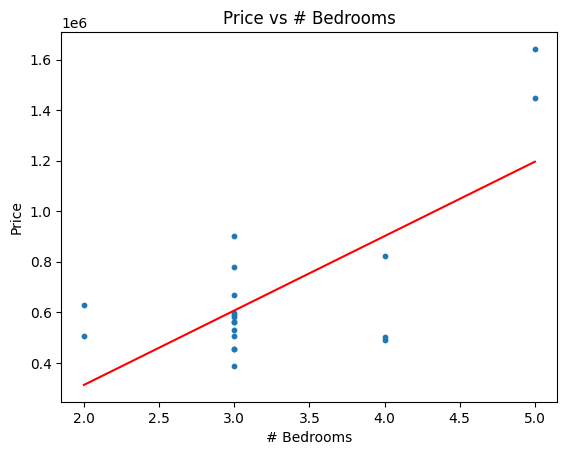

Age of home and Price have a correlation coefficient of -0.39


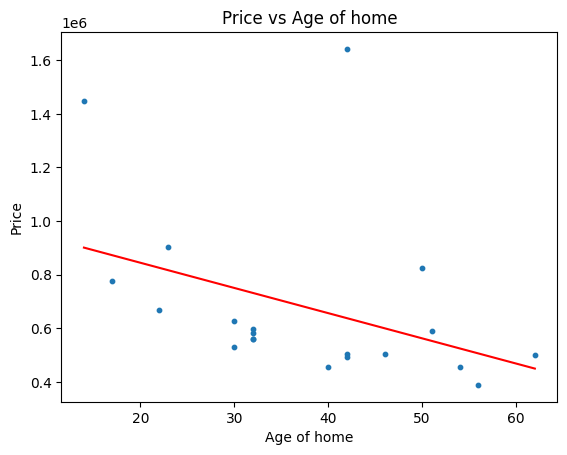

In [15]:
feature_names = data_frame.drop(columns=["House ID", "Price"]).columns

correlation_coefficients = []

for i, name in enumerate(feature_names):
    x = features[:, i]

    a, b = np.polyfit(x, prices, 1)

    #line of best fit
    xs = np.linspace(x.min(), x.max(), 200)
    correlation_coefficient = np.corrcoef(x, prices)[0, 1]
    print(f"{name} and Price have a correlation coefficient of {correlation_coefficient:.2f}")
    correlation_coefficients.append((name, correlation_coefficient.round(2)))



    plt.figure()
    plt.scatter(x, prices, s=10)
    plt.plot(xs, a*xs + b, color="red")
    plt.xlabel(name)
    plt.ylabel("Price")
    plt.title(f"Price vs {name}")
    plt.show()

In [16]:
for cof in correlation_coefficients:
    print(cof, end='\n')

('Bathrooms', np.float64(0.93))
('Land Area', np.float64(0.73))
('Living area', np.float64(0.94))
('# Garages', np.float64(0.49))
('# Rooms', np.float64(0.85))
('# Bedrooms', np.float64(0.72))
('Age of home', np.float64(-0.39))


From the Data Analysis we can see a positive correlation between every feature except for the age of a home.

But the strongest correlation is between the price and living area.

| Feature | Correlation to Price|
| ------- | ------------------- |
| Bathrooms | 0.93 |
| Land Area | 0.73 |
| Living Area | 0.94 |
| # Garages | 0.49 |
| # Rooms | 0.85 |
| # Bedrooms | 0.72 |
| Age of home | -0.39 |

Even the other features point to the fact that the overall size of the house is what drives price up (e.g. Garages aren't livable space, and have the lowest positive correlation out of features of the house (land area is a feature of the lot technically))

So technically its a 4 way tie between the living area, # rooms, # bedrooms, and # bathrooms.

I just thought this was interesting I know we don't technically have to do it for the assignment, but it matches up with the regression later.

## Fit the regression

In [17]:
X = add_bias(features)

theta = fit(X, prices)
predictions = predict(X, theta)

mse = np.mean((prices - predictions)**2)

print("Average least squares error (MSE):", mse)


Average least squares error (MSE): 5006561505.204386


In [18]:
weights = theta[:-1]  

for name, w in zip(feature_names, weights):
    print(name, w)


Bathrooms 209185.84518377928
Land Area 10192.814902779302
Living area 228669.13035840908
# Garages 47994.95970134847
# Rooms 113529.57924220986
# Bedrooms -151116.1182985686
Age of home -2133.473654254525


In [19]:
mu = features.mean(axis=0)
sigma = features.std(axis=0)

features_std = (features - mu) / sigma


In [20]:
X_std = add_bias(features_std)
theta_std = fit(X_std, prices)

weights = theta_std[:-1]


In [21]:
for name, w in zip(feature_names, weights):
    print(name, abs(w))


Bathrooms 96287.9968595596
Land Area 25775.889029511647
Living area 140975.31215829137
# Garages 31654.849994580592
# Rooms 136235.49509064073
# Bedrooms 115828.31135199191
Age of home 27607.47058909586


In [22]:
best = "Living area"

X1 = add_bias(data_frame[[best]].values)
theta1 = fit(X1, prices)
pred1 = predict(X1, theta1)

print("MSE (only best feature):", np.mean((prices - pred1)**2))


MSE (only best feature): 12282616798.302181


In [23]:
reduced_cols = [c for c in feature_names if c != "Land Area"]

Xr = add_bias(data_frame[reduced_cols].values)
thetar = fit(Xr, prices)
predr = predict(Xr, thetar)

print("MSE (without least feature):", np.mean((prices - predr)**2))


MSE (without least feature): 5166488517.313247


## Part two report
Using all features, the model achieved an MSE of 500,656,150.
Living area had the largest standardized coefficient and therefore the strongest influence on price.
Using only this feature increased MSE to 1,228,261,798, showing that additional features are necessary.
Land area had the smallest coefficient, and removing it only slightly increased error to 516,648,517, indicating minimal impact.